In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**1:** Biểu diễn lại bài toán, tính lại đạo hàm loss function với từng biến w.

Suppose:
$$\overline{X} = [x_1,x_2,x_3,...x_N]$$
$$w^T = [w_0,w_1,w_2,...,w_d]$$

We have density function:
$$P(y_i=1|x_i,w) = f(w^Tx_i)$$
$$P(y_i=0|x_i,w) = 1-f(w^Tx_i)$$

Set: $z_i = f(w^Tx_i)$

$$\rightarrow P(y_i|x_i,w) = f(w^Tx_i)^{y_i}(1-f(w^Tx_i))^{1-y_i}$$
$$=z_i^{y_i}(1-z_i)^{1-y_i}$$
$$\rightarrow P(y|x,w) = \prod_{i=1}^N P(y_i|x_i,w)$$
$$= \prod_{i=1}^N z_i^{y_i}(1-z_i)^{1-y_i}$$

We have: 
$$J(w) = -log(P(y|x,w)) = -\sum_{i=1}^N [y_ilog(z_i) + 1-y_i)log(1-z_i)]$$
with $z_i$ is sigmoid function $z_i=\sigma(z) = \sigma(w_0 + w_1x_i)$

\begin{cases}
\dfrac{\partial J}{\partial w_0} = \dfrac{\partial J}{\partial z_i}.\dfrac{\partial z_i}{\partial z}. \dfrac{\partial z}{\partial w_0} = \dfrac{-y_i(1-z_i)+z_i(1-y_i)}{z_i(1-z_i)}.z_i(1-z_i) = z_i-y_i \\
\dfrac{\partial J}{\partial w_1} = \dfrac{\partial J}{\partial z_i}.\dfrac{\partial z_i}{\partial z}. \dfrac{\partial z}{\partial w_1} = \dfrac{-y_i(1-z_i)+z_i(1-y_i)}{z_i(1-z_i)}.z_i(1-z_i)x_i = (z_i-y_i)x_i\\
\end{cases}

**2:** [Optional] Chứng minh hàm sigmoid được tìm ra để cho đạo hàm của loss function với w đẹp nhờ phép tính vi phân, tham khảo: https://machinelearningcoban.com/2017/01/27/logisticregression/?fbclid=IwAR1ukaoKF9xThy-9dLX3uCJl9igZUbhMQA0DFzknWw2ISdVcxKVL10-ZL80#toi-uu-ham-mat-mat

Đối với mỗi điểm dữ liệu thứ $i$:
$$\dfrac {\partial L} {\partial w_0} =\sum_{i=1}^n \dfrac {\partial L} {\partial \hat y_i} \dfrac {\partial \hat y_i} {\partial w_0} =\sum_{i=1}^n \dfrac {\partial L} {\partial \hat y_i}\left( \dfrac{d\hat y_i}{d\hat z_i} \dfrac{\partial \hat z_i} {\partial w_0} \right)
\\
=\sum_{i=1}^n \left[-\frac 1 n \left(\frac {y_i} {\hat y_i} - \frac {1 - y_i} {1 - \hat y_i}\right)\right]\left[\dfrac{d\hat y_i}{d\ \theta_i}\right]
= \frac 1 n \sum_{i=1}^n \dfrac {\hat{y_i} - y_i}{\hat{y_i}(1-\hat{y_i})}\left[\dfrac{d\hat y_i}{d\ \theta_i}\right]$$

Để cho đạo hàm của loss function đẹp, ta muốn tìm hàm $\hat {y_i}$ sao cho 
$$\dfrac{d\hat y_i}{d\ w_0}= \hat{y_i}(1-\hat{y_i}) $$ (để triệt tiêu mẫu số)

Biến đổi tương đương biểu thức trên (với $\hat {y_i} \neq 0, 1$) sau đó tích phân 2 vế ta có
$$\dfrac{d\hat y_i}{\hat{y_i}(1-\hat{y_i})}= d\ {\theta_i}$$
$$\Rightarrow \int \dfrac{d\hat y_i}{\hat{y_i}(1-\hat{y_i})}= \int d\ {\theta_i}$$
$$\Rightarrow \int \left(\dfrac{1}{\hat{y_i}} + \dfrac{1}{1 -\hat{y_i}}\right)d\hat{y_i}= \ {\theta_i} + C$$
$$\Rightarrow \ln \left|{\hat {y_i}}\right| - \ln \left|{1 -\hat {y_i}}\right| = \ {\theta_i} + C$$
$$\Rightarrow \ln \left|\dfrac {\hat {y_i}} {1 -\hat {y_i}}\right| = \ {\theta_i} + C$$
Đến đây ta tìm hàm $\hat {y_i}$ theo $\ {\theta_i}$:

$$\dfrac {\hat {y_i}} {1 -\hat {y_i}} = \alpha e^{\ {\theta_i}} \Leftrightarrow 
\dfrac 1 {1 - \hat {y_i}} = 1 + \alpha e^{\ {\theta_i}}$$ (Cộng cả hai vế với 1)
$$\Leftrightarrow 1 - \hat{y_i} = \dfrac 1 {1 + \alpha e^{\ {\theta_i}}}$$
$$\Leftrightarrow \hat{y_i} = \dfrac {\alpha e^{\ {\theta_i}}} {1 + \alpha e^{\ {\theta_i}}} = \dfrac 1 {1 + \alpha e^{-\hat {\theta_i}}}$$
Khi $ \alpha = 1$ ta có hàm sigmoid như đã sử dụng trong bài toán trên

**3:** Thử chỉnh learning_rate với code mẫu, vẽ loss function theo epoch để xem độ tăng giảm của loss function.

In [ ]:
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, d-1].reshape(-1, 1)

In [ ]:
# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

Text(0, 0.5, 'kinh nghiệm (năm)')

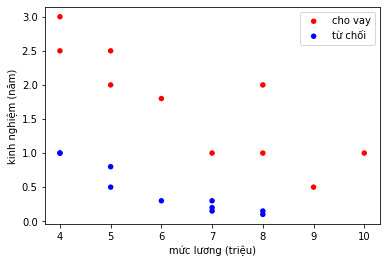

In [ ]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [ ]:
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [ ]:
# Số lần lặp bước 2
numOfIteration = 1000
learning_rate = 0.01
loss_history = []

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    loss = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    # np.dot: nhan ma tran, * / multiply : element-wise
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    print(loss)
    loss_history.append(loss)

14.378322197782444
14.375360086218532
14.526171530840474
14.514268487685255
14.616331240013096
14.455261557819918
14.403350793372358
14.14832827616579
13.979866993277378
13.71835467453668
13.486353269242443
13.254281210255511
12.992784246779994
12.795288019617523
12.525609433927437
12.357591729886341
12.093919626994568
11.948445060409043
11.700252708998784
11.571353325270024
11.344555929200416
11.227963824840522
11.025703552756607
10.918811024855247
10.74211332440032
10.643643256295498
10.49198407339428
10.401567649590643
10.27334863023987
10.191102029575045
10.084032935309823
10.01018497798568
9.921582523200916
9.85619039083306
9.783210175108465
9.725990489974325
9.665810374815464
9.61609684630016
9.566065076375208
9.522878994890032
9.48063066445433
9.442824187407968
9.406360774574733
9.372778313072399
9.340502833248394
9.310111554063136
9.28081798657214
9.252780996284724
9.22560667636793
9.19929876249761
9.173655796372309
9.148639124647241
9.124141840532957
9.100123491933415
9.076524

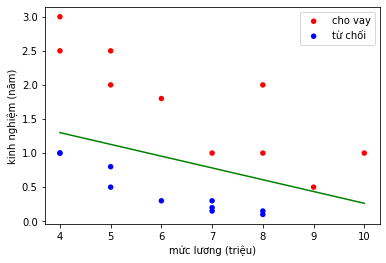

In [ ]:
# Vẽ đường phân cách.
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

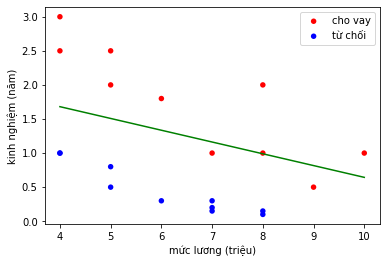

In [ ]:
# Vẽ đường phân cách.
t = 0.8
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

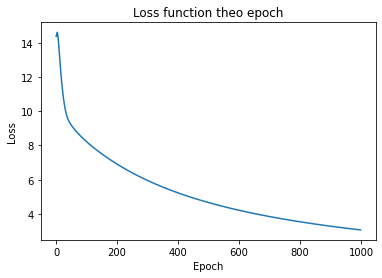

In [ ]:
plt.plot(loss_history)
plt.title("Loss function theo epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**4:** Thử giải bài toán XOR (https://dev.to/jbahire/demystifying-the-xor-problem-1blk?fbclid=IwAR01HGT3F3WjKjXtQCtokkIGKYagdQrPC-JJ9AHAFhOi8pvI3BHKVw-DMPM#:~:text=The%20XOR%2C%20or%20%E2%80%9Cexclusive%20or,value%20if%20they%20are%20equal ) bằng logistic regression (chạy code thật) Giải thích tại sao lại không tìm được? Trong model đổi hàm linear trong sigmoid bằng hàm non-linear để giải bài toán XOR (parabol, ellipse, (x-a)/(x-b)

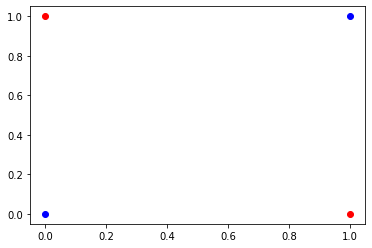

In [ ]:
#đồ thị XOR
plt.scatter([0, 1], [0, 1], c='blue')
plt.scatter([0, 1], [1, 0], c='red')
plt.show()

In [ ]:
x = np.array([[1, 0, 0],
              [1, 1, 0],
              [1, 0, 1],
              [1, 1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)
w = np.array([0, 0.1, 0.1]).reshape(-1, 1)

In [ ]:
numOfIteration = 100
learning_rate = 0.1
loss_history = []
for i in range(numOfIteration):
  y_pred = sigmoid(x.dot(w))
  loss = -np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
  w = w - learning_rate * x.T.dot(y_pred - y)
  print(loss)
  loss_history.append(loss)

2.780079370088679
2.7781296641010877
2.7767417566377537
2.7757522562464807
2.775045152975136
2.7745381733940144
2.774173017631652
2.7739083974934813
2.7737150839470877
2.7735723900984888
2.7734656766801384
2.7733845843585025
2.773321781902574
2.7732720800892388
2.773231804707198
2.773198353009384
2.7731698799977833
2.7731450765668284
2.773123012623636
2.77310302616245
2.7730846448356608
2.7730675305027086
2.773051440025167
2.7730361975478726
2.773021674900357
2.7730077777389504
2.7729944357471643
2.772981595705027
2.772969216586527
2.772957266090832
2.772945718187067
2.7729345513756787
2.7729237474563924
2.7729132906543694
2.7729031669996456
2.772893363885677
2.7728838697546028
2.7728746738721197
2.7728657661658165
2.772857137108416
2.7728487776328565
2.7728406790699314
2.7728328331019645
2.772825231727882
2.7728178672364003
2.7728107321850337
2.772803819383258
2.7727971218786873
2.7727906329454477
2.772784346074129
2.7727782549629496
2.7727723535098066
2.772766635805004
2.772761096124

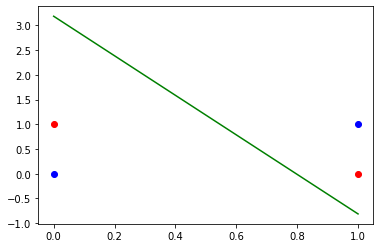

In [ ]:
#vẽ đường phân cách 
t = 0.5
plt.scatter([0, 1], [0, 1], c='blue')
plt.scatter([0, 1], [1, 0], c='red')
plt.plot((-(w[0]-2*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 2*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

# Để giải bài toán này, chúng ta có thể sử dụng một số hàm phi tuyến khác như parabol, elip hay hyperbol. Ở đây chúng ta sẽ sử dụng hyperbol dạng $x_2^{(i)}=\dfrac{-w_1x_1^{(i)}-w_0}{x_1^{(i)}+w_2}$ hay $w_0 + w_1x_1^{(i)} + w_2x_2^{(i)} + x_1x_2 = 0$. Khi đó ta có hàm dự đoán $\hat {y_i} = \sigma(w_0 + w_1x_1^{(i)} + w_2x_2^{(i)} + x_1^{(i)}x_2^{(i)})$ hay mở rộng lên là $\hat y = \sigma (Xw + x_1\circ x_2)$. Còn biểu thức cập nhật trọng số vẫn giữ nguyên do các đạo hàm tương ứng theo các $w_i$ thành phần không đổi

In [ ]:
x = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)
w = np.array([0, 0, 0]).reshape(-1, 1) #0.2, -0.4, -0,7

In [ ]:
numOfIteration = 100
learning_rate = 0.1
loss_history = []
for i in range(numOfIteration):
  y_pred = sigmoid(x.dot(w) + (x[:, 1] * x[:, 2]).reshape(-1, 1))
  loss = -np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
  w = w - learning_rate * x.T.dot(y_pred - y)
  print("Iteration = {}, loss = {}".format(i, loss))    
  loss_history.append(loss)
  

Iteration = 0, loss = 3.392703229198059
Iteration = 1, loss = 3.3777647367996892
Iteration = 2, loss = 3.3665581286284674
Iteration = 3, loss = 3.358114695387421
Iteration = 4, loss = 3.3517083855106335
Iteration = 5, loss = 3.3467996100156143
Iteration = 6, loss = 3.342989982526345
Iteration = 7, loss = 3.339986858035484
Iteration = 8, loss = 3.337576101174241
Iteration = 9, loss = 3.335601482887057
Iteration = 10, loss = 3.333949265210104
Iteration = 11, loss = 3.3325367650943063
Iteration = 12, loss = 3.3313039251366625
Iteration = 13, loss = 3.330207131773617
Iteration = 14, loss = 3.3292146994665095
Iteration = 15, loss = 3.328303582081592
Iteration = 16, loss = 3.327456983847899
Iteration = 17, loss = 3.3266626272357005
Iteration = 18, loss = 3.32591149911672
Iteration = 19, loss = 3.3251969443125846
Iteration = 20, loss = 3.3245140109735454
Iteration = 21, loss = 3.32385897822814
Iteration = 22, loss = 3.3232290155869757
Iteration = 23, loss = 3.322621937482125
Iteration = 24, l

In [ ]:
def hyperbol(x, w):
  return (-w[1][0]*x - w[0][0])/(x + w[2][0])

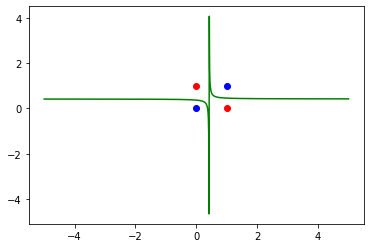

In [ ]:
t = 0.5
# 
# xsample = np.linspace(-5, 0.49, num=1000)
# xsample = np.linspace(0.51, 5, num=1000)


ysample = hyperbol(xsample, w)
plt.scatter([0, 1], [0, 1], c='blue')
plt.scatter([0, 1], [1, 0], c='red')
plt.plot(xsample, ysample, 'g')
plt.show()

**5:** Học, hiểu và replicate lại tutorial này (logistic regression dùng thư viện cũng như các bước để xử lý dữ liệu) \
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python?fbclid=IwAR3FnZHeVjvSJU6GFnuHwrusYkvM6Yf-stbNel4MNX4Kq19XIUaWX-sN2Zc

Phương trình hồi quy tuyến tính: $$y=\beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_n x_n$$
Trong đó, y là biến phụ thuộc và x1, x2 ... và Xn là biến giải thích.\
Hàm sigmoid: $$Sigmoid(x)=\frac{1}{1+e^{-x}}$$


In [ ]:
#import pandas
import pandas as pd
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Selecting Feature**

In [ ]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',  'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,  14],
       [ 25,  37]])

Bạn có hai lớp 0 và 1. Giá trị đường chéo đại diện cho các dự đoán chính xác, trong khi các phần tử không phải đường chéo là các dự đoán không chính xác. Trong đầu ra, 116 và 37 là dự đoán thực tế, và 25 và 14 là dự đoán không chính xác.

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

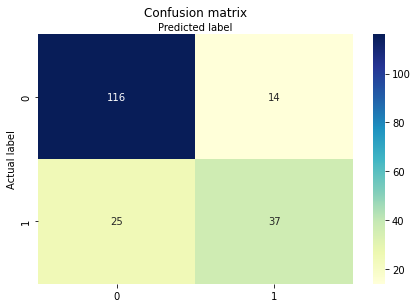

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.796875
Precision: 0.7254901960784313
Recall: 0.5967741935483871


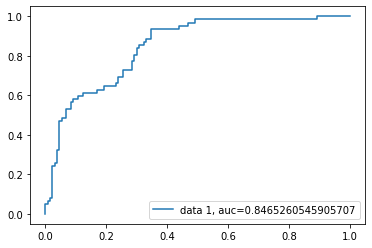

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**6:** [Optional] Chứng minh: binary crossentropy loss là hàm lồi, còn mean squared error không phải hàm lồi,https://stats.stackexchange.com/questions/326350/what-is-happening-here-when-i-use-squared-loss-in-logistic-regression-setting/326381?fbclid=IwAR2oaVRNSFA7vgvqAETz9UJtO92XY6NvTiKEQlAm_LgAC-7KrDYfjIxMgNo#326381

Let's get some notation. Let $$L_S(y_i,\hat y_i)=\frac 12(y_i−\hat y_i)^2 $$and$$ L_L(y_i,\hat y_i)=y_ilog \hat y_i+(1−y_i)log(1−\hat y_i)$$ 
If we're doing maximum likelihood (or minimum negative log likelihood as I'm doing here), we have
$$\hat β_L:=argmin_{~b∈Rp}−∑_{i=1}^n y_ilog~g^{−1}(x^T_ib)+(1−y_i)log(1−g^{−1}(x^T_ib))$$ with g being our link function.\
Alternatively we have
$$\hat β_L:=argmin_{~b∈Rp}−∑_{i=1}^n y_ilog~g^{−1}(x^T_ib))^2$$
as the least squares solution. Thus $\hat{β_S}$ minimizes $L_S$ and similarly for $L_L$.
